In [400]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold

import statsmodels.tools.tools as sm
%matplotlib inline
plt.style.use('ggplot')

In [401]:
#read in data into pandas with low_memory=False
#df = pd.read_csv('/Users/morganabbitt/galvanize/capstone/NFL-Analytics//data/NFL Play by Play 2009-2018 (v5).csv', low_memory=False)

In [402]:
pd.set_option('display.max_columns', None)

In [403]:
#important features
#play_id, game_id, home_team, away_team, posteam, posteam_type, defteam, side_of_field, yardline_100,
#game_date, game_seconds_remaining, drive, sp, qtr, down, goal_to_go, time, yrdln, ydstogo, 
#total_home_score, total_away_score, posteam_score, defteam_score, ep, epa, wp, play_type 
#third_down_converted, third_down_failed, fourth_down_converted, fourth_down_failed, penalty, touchdown
#quarter_end, field_goal_result, kick_distance

In [404]:
# df = df[['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100'
# ,'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
# 'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
# 'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
# 'quarter_end', 'field_goal_result', 'kick_distance']]

In [405]:
# df = df[(df['qtr'] == 1.0) | (df['qtr'] == 3.0)]
# df = df[df['quarter_end'] == 0]
# df = df[df['down'].notna()]

In [406]:
def clean_data(filepath):
    #read the pathname of the file in, use low_memory=False
    df = pd.read_csv(filepath, low_memory=False)
    #lst of important columns out of 255
    lst_cols = ['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
        'game_date', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 
        'total_home_score', 'total_away_score', 'posteam_score', 'defteam_score', 'ep', 'epa', 'wp', 'play_type', 
        'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'penalty', 'touchdown',
        'quarter_end', 'field_goal_result', 'kick_distance']
    #grabbing all important columns
    df = df[lst_cols]
    #grabbing only the 1st and third quarters to avoid time constraints and large leads
    df = df[(df['qtr'] == 1) | (df['qtr'] == 3)]
    #getting rid of plays at the end of the quarters
    df = df[df['quarter_end'] == 0]
    #gets rid of plays that are extra points or kick offs 
    df = df[df['down'].notna()]
    #returns df with all downs from quarters 1 and 3
    df['field_goal_result'] = df['field_goal_result'].replace({'missed': 0, 'made': 1, 'blocked':0}).fillna(0)
    return df
    

In [407]:
#uses clean df to grab all 4th downs
def fourth_downs(df):
    mask_4th = df['down'] == 4.0
    df = df[mask_4th].drop(df[mask_4th][df[mask_4th]['yardline_100'].isnull()].index)
    return df

In [408]:
#uses 4th down df to grab moments that were 'go for it'
def fourth_pass_or_run(df_4ths, df):
    mask_go = (df['play_type'] == 'pass') | (df['play_type'] == 'run')
    return df_4ths[mask_go]

In [409]:
dataframe = clean_data('/Users/morganabbitt/galvanize/capstone/NFL-Analytics//data/NFL Play by Play 2009-2018 (v5).csv')

In [410]:
fourths = fourth_downs(dataframe)

In [411]:
pass_or_run = fourth_pass_or_run(fourths, dataframe)

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/mat

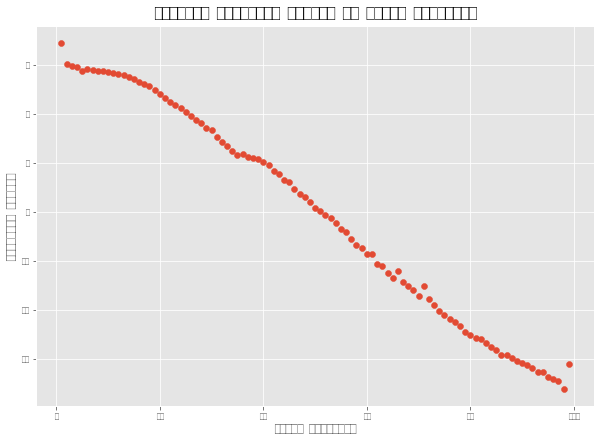

In [412]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Average Expected Points by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Expected Points', size=15)
plt.scatter(fourths.groupby('yardline_100')[['ep']].mean().index, fourths.groupby('yardline_100')[['ep']].mean().values) 

/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 86 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 68 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/morganabbitt/anaconda3/lib/python3.7/site-packages/matp

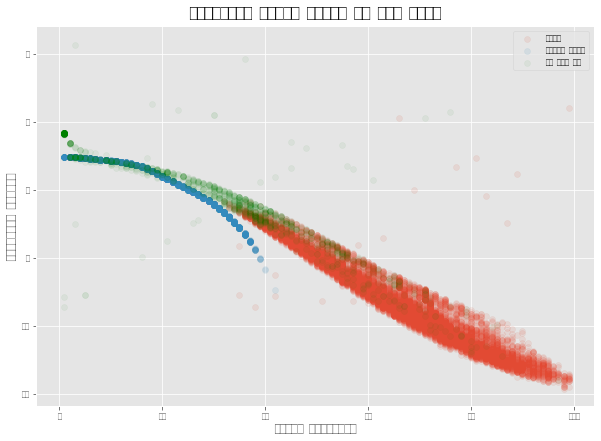

In [413]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Expected Point Value on 4th Down', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Expected Points', size=15)
plt.scatter(fourths[fourths['play_type'] == 'punt']['yardline_100'].values, fourths[fourths['play_type'] == 'punt']['ep'].values,alpha=0.1, label='Punt')
plt.scatter(fourths[fourths['play_type'] == 'field_goal']['yardline_100'].values, fourths[fourths['play_type'] == 'field_goal']['ep'].values, alpha=0.1, label='Field Goal')
plt.scatter(pass_or_run['yardline_100'].values, pass_or_run['ep'].values, alpha=0.05, c='green', label='Go for it')
plt.legend()

In [322]:
xx = np.linspace(1,101)
best_line = x1 + x2*xx

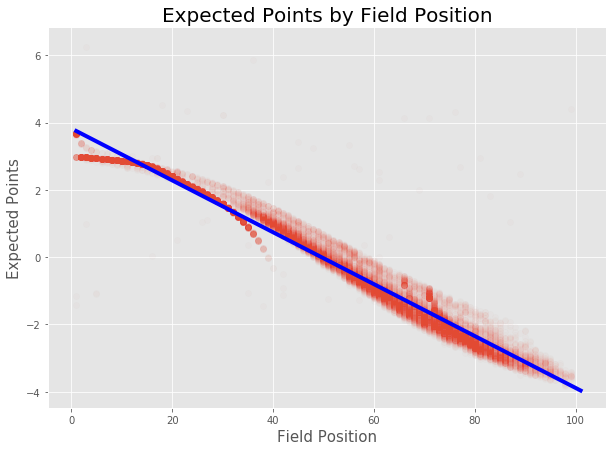

In [341]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Expected Points by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Expected Points', size=15)
plt.plot(xx, best_line, linewidth=4, color='b')
plt.scatter(fourths['yardline_100'].values, fourths['ep'].values, alpha=0.02)

In [294]:
y = fourths['ep'].values
X = fourths['yardline_100'].values
ols = OLS(y, sm.add_constant(X))
results = ols.fit()
x1, x2 = results.params

In [317]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 5.029e+05
Date:                Mon, 03 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:45:42   Log-Likelihood:                -6306.1
No. Observations:               17113   AIC:                         1.262e+04
Df Residuals:                   17111   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8257      0.006    600.877      0.000       3.813       3.838
x1            -0.0771      0.000   -709.154      0.000      -0.077      -0.077
==============================================================================
Omnibus:                    12315.827   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2372765.934
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      60.469   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

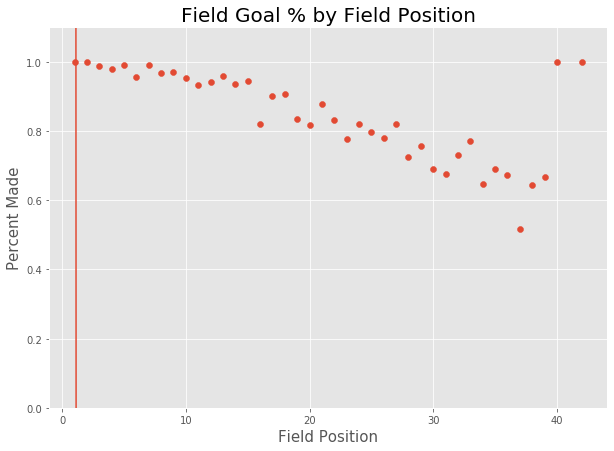

In [375]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Field Goal % by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Percent Made', size=15)
plt.ylim(0, 1.1)
#plt.scatter(np.arange(1, 42), fourths[fourths['play_type'] == 'field_goal'].groupby('yardline_100')[['field_goal_result']].mean().values)
plt.scatter(fourths[fourths['play_type'] == 'field_goal'].groupby('yardline_100')[['field_goal_result']].mean().index, fourths[fourths['play_type'] == 'field_goal'].groupby('yardline_100')[['field_goal_result']].mean().values)
plt.plot(xpts, yhat)

In [366]:
y = fourths[fourths['play_type'] == 'field_goal'].groupby('yardline_100')[['field_goal_result']].mean().index
X = fourths[fourths['play_type'] == 'field_goal'].groupby('yardline_100')[['field_goal_result']].mean().values

In [373]:
xpts = np.linspace(1, 42)[:, None]

In [374]:
model2 = Pipeline([ ('pf', PolynomialFeatures(2)),
                    ('lr', LinearRegression()) ])
model2.fit(X, y)        

yhat = model2.predict(xpts)

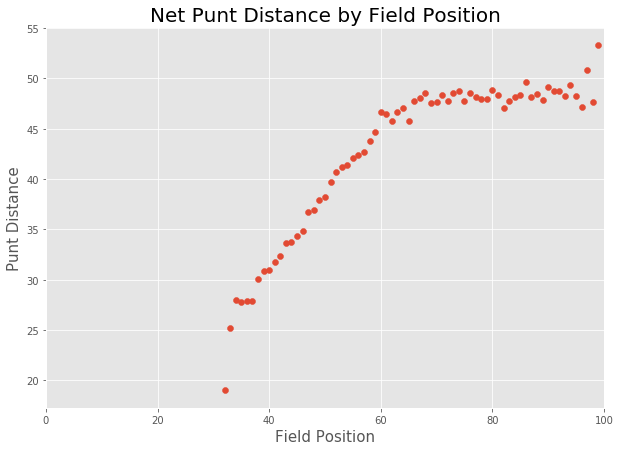

In [229]:
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Net Punt Distance by Field Position', size=20)
plt.xlabel('Field Position', size=15)
plt.ylabel('Punt Distance', size=15)
plt.xlim(0, 100)
plt.scatter(np.arange(32, 100), fourths[fourths['play_type'] == 'punt'].groupby('yardline_100')[['kick_distance']].mean().values)

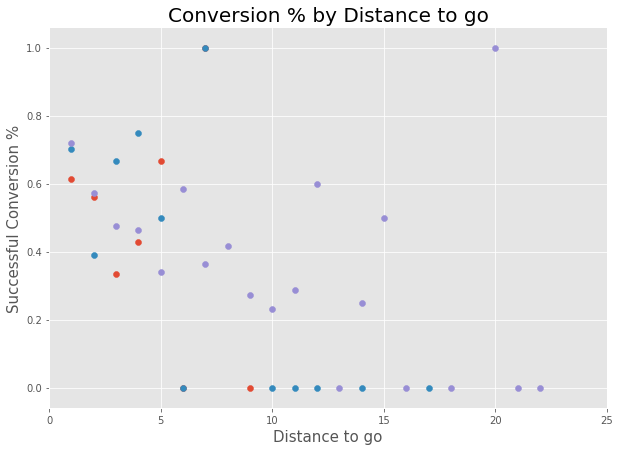

In [264]:
plt.figure(figsize=(10,7))
plt.title('Conversion % by Distance to go', size=20)
plt.xlabel('Distance to go', size=15)
plt.ylabel('Successful Conversion %', size=15)
plt.xlim(0, 25)

plt.scatter(pass_or_run[pass_or_run['yardline_100'] <= 10].groupby('ydstogo')[['fourth_down_converted']].mean().index, pass_or_run[pass_or_run['yardline_100'] <= 10].groupby('ydstogo')[['fourth_down_converted']].mean().values)
plt.scatter(pass_or_run[(pass_or_run['yardline_100'] > 10) & (pass_or_run['yardline_100'] <= 20)].groupby('ydstogo')[['fourth_down_converted']].mean().index, pass_or_run[(pass_or_run['yardline_100'] > 10) & (pass_or_run['yardline_100'] <= 20)].groupby('ydstogo')[['fourth_down_converted']].mean().values)
plt.scatter(pass_or_run[pass_or_run['yardline_100'] > 20].groupby('ydstogo')[['fourth_down_converted']].mean().index, pass_or_run[pass_or_run['yardline_100'] > 20].groupby('ydstogo')[['fourth_down_converted']].mean().values)